In [1]:
import os 
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
# Open AODSO4dn
os.chdir('/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/AODSO4dn/')
flist_AODSO4dn = (
['b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.185001-185912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.186001-186912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.187001-187912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.188001-188912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.189001-189912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.190001-190912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.191001-191912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.192001-192912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.193001-193912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.194001-194912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.195001-195912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.196001-196912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.197001-197912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.198001-198912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.199001-199912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.200001-200912.nc',  
'b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.AODSO4dn.201001-201412.nc'])

AODSO4dn = xr.open_mfdataset(flist_AODSO4dn, combine='by_coords')['AODSO4dn']

In [3]:
mask = xr.open_dataarray('/glade/u/home/jzweifel/jupyter_workspaces/Masters_paper_analysis/weighting_and_masks/Area_weighted_NPO_mask.nc')
AODSO4dn_by_month = {}

for m in range(1, 13):
    AODSO4dn_by_month[m] = (AODSO4dn*mask).sel(time=AODSO4dn['time.month'] == m).mean(dim=['lat', 'lon'])



In [40]:
import numpy as np
import calendar

# Model months: 2 → 12, then wraps back to 1
model_months = list(np.arange(2, 13)) + [1]  # [2, 3, 4, ..., 12, 1]

# Real month names (1–12)
month_names = list(calendar.month_abbr[1:])  # ['Jan', 'Feb', 'Mar', ..., 'Dec']

# Create the mapping dictionary
month_map = dict(zip(model_months, month_names))

print(month_map)

{2: 'Jan', 3: 'Feb', 4: 'Mar', 5: 'Apr', 6: 'May', 7: 'Jun', 8: 'Jul', 9: 'Aug', 10: 'Sep', 11: 'Oct', 12: 'Nov', 1: 'Dec'}


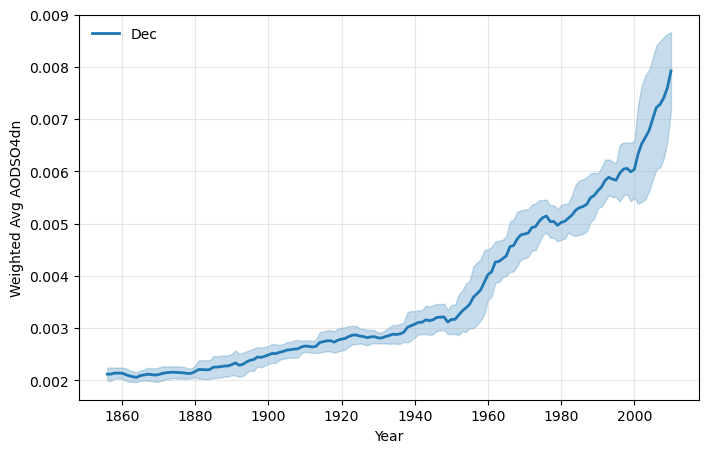

In [44]:
AOD = AODSO4dn_by_month[1].compute()
years = AOD['time.year']

rolling_mean = AOD.rolling(time=11, center=True).mean()
rolling_std  = AOD.rolling(time=11, center=True).std()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(years, rolling_mean, color='tab:blue', lw=2, label=month_map[1])
ax.fill_between(years, rolling_mean - rolling_std, rolling_mean + rolling_std, color='tab:blue', alpha=0.25)
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Avg AODSO4dn')
ax.legend(frameon=False)
ax.grid(alpha=0.3)
plt.show()

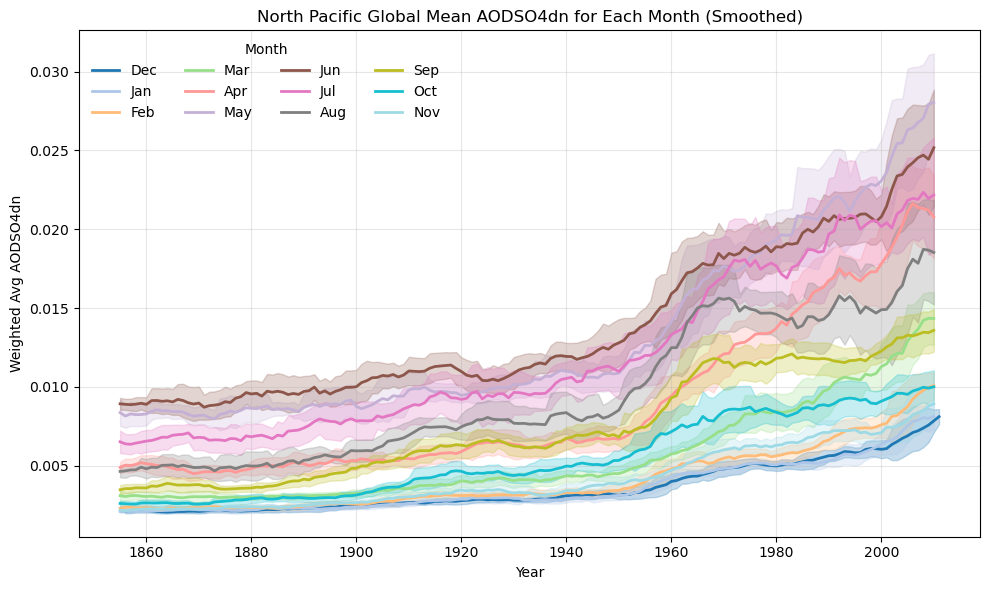

In [52]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a colormap with 12 distinct colors (one for each month)
colors = plt.get_cmap('tab20', 12)  # or 'viridis', 'plasma', etc.

fig, ax = plt.subplots(figsize=(10,6))

# Loop over each month (1–12)
for m in range(1,13):#[2, 5, 8, 11]:
    AOD = AODSO4dn_by_month[m].compute()
    years = AOD['time.year']

    rolling_mean = AOD.rolling(time=10, center=True).mean()
    rolling_std  = AOD.rolling(time=10, center=True).std()

    ax.plot(years, rolling_mean, color=colors(m-1), lw=2, label=month_map[m])
    ax.fill_between(years, rolling_mean - rolling_std, rolling_mean + rolling_std, color=colors(m-1), alpha=0.25)

# Labels and formatting
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Avg AODSO4dn')
ax.set_title('North Pacific Global Mean AODSO4dn for Each Month (Smoothed)')
ax.legend(title='Month',ncol=4, frameon=False)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()